In [1]:
# Conventionally, pd and plt are commonly chosen as names to import pandas and pyplot.
# This is not a requirement, but it is very common.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame" which is the 
path_to_ny_sales = '../datasets/nyc-property/nyc-rolling-sales.csv'
sales_df = pd.read_csv(path_to_ny_sales)

# And, it makes it easy to take a look at the first n items:
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
# Lets make things simpler by dropping a few columns:
columns_to_drop = [
    'Unnamed: 0', # I still honestly do not know what this column even is.
    'TAX CLASS AT PRESENT',
    'BLOCK',
    'LOT',
    'EASE-MENT',
    'BUILDING CLASS AT PRESENT',
    'TAX CLASS AT TIME OF SALE',
    'BUILDING CLASS AT TIME OF SALE',
    'BUILDING CLASS CATEGORY'
]

# Note, the drop operation is NOT in place, we have to store the result back into the 
# variable if we want to replace the data. We could also make a NEW variable that has
# the data dropped, and maintain the data frame with al the original data.
sales_df = sales_df.drop(columns=columns_to_drop)

# Lets look at the columns now...
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BOROUGH            84548 non-null  int64 
 1   NEIGHBORHOOD       84548 non-null  object
 2   ADDRESS            84548 non-null  object
 3   APARTMENT NUMBER   84548 non-null  object
 4   ZIP CODE           84548 non-null  int64 
 5   RESIDENTIAL UNITS  84548 non-null  int64 
 6   COMMERCIAL UNITS   84548 non-null  int64 
 7   TOTAL UNITS        84548 non-null  int64 
 8   LAND SQUARE FEET   84548 non-null  object
 9   GROSS SQUARE FEET  84548 non-null  object
 10  YEAR BUILT         84548 non-null  int64 
 11  SALE PRICE         84548 non-null  object
 12  SALE DATE          84548 non-null  object
dtypes: int64(6), object(7)
memory usage: 8.4+ MB


In [3]:
# All those dashes are missing data... lets remove records that don't have a known sale price
# note again, these operations are NOT in place.

# First, coerce the column to a numeric type, and give unconvertable values "NA"
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')

# Second, select the rows where the SALE PRICE is NOT NA
sales_df = sales_df[ sales_df['SALE PRICE'].notna() ]

sales_df['SALE PRICE']

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [14]:
# Wow, there were nearly 15k missing sales prices!
# Now, lets convert the rest of the columns that ought to be numeric...
columns_to_convert = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET'
]

for column_name in columns_to_convert:
    sales_df[column_name] = pd.to_numeric(sales_df[column_name], errors='coerce')
    sales_df = sales_df[sales_df[column_name].notna()]
    
    
# Lets look at the columns now...
for column_name, data_type in zip(sales_df.columns, sales_df.dtypes):
    print(column_name, data_type)
    
# Now, lets get the summary again:
sales_df.describe()

BOROUGH int64
NEIGHBORHOOD object
ADDRESS object
APARTMENT NUMBER object
ZIP CODE int64
RESIDENTIAL UNITS int64
COMMERCIAL UNITS int64
TOTAL UNITS int64
LAND SQUARE FEET float64
GROSS SQUARE FEET float64
YEAR BUILT int64
SALE PRICE float64
SALE DATE object


,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,3.251741,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,0.903136,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,3.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [15]:
# Now there are some columns acting as numberical columns that should be
# treated as categorical columns. Lets fix that too:
categorical_columns = [
    'BOROUGH',
    'ZIP CODE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')
    
sales_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,4.824400e+04
mean,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.153281e+06
std,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,1.340131e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,8.042000e+04
50%,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,4.800000e+05
75%,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,8.300000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [20]:
sales_df = sales_df[sales_df['GROSS SQUARE FEET'] > 0]
sales_df = sales_df[sales_df['LAND SQUARE FEET'] > 0]
sales_df = sales_df[sales_df['YEAR BUILT'] > 0]
sales_df = sales_df[sales_df['TOTAL UNITS'] > 0]

sales_df.info()
sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36739 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BOROUGH            36739 non-null  category
 1   NEIGHBORHOOD       36739 non-null  object  
 2   ADDRESS            36739 non-null  object  
 3   APARTMENT NUMBER   36739 non-null  object  
 4   ZIP CODE           36739 non-null  category
 5   RESIDENTIAL UNITS  36739 non-null  int64   
 6   COMMERCIAL UNITS   36739 non-null  int64   
 7   TOTAL UNITS        36739 non-null  int64   
 8   LAND SQUARE FEET   36739 non-null  float64 
 9   GROSS SQUARE FEET  36739 non-null  float64 
 10  YEAR BUILT         36739 non-null  int64   
 11  SALE PRICE         36739 non-null  float64 
 12  SALE DATE          36739 non-null  object  
dtypes: category(2), float64(3), int64(4), object(4)
memory usage: 3.5+ MB


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,36739.000000,36739.000000,36739.000000,3.673900e+04,3.673900e+04,36739.000000,3.673900e+04
mean,3.187811,0.323770,3.510357,4.094530e+03,4.758459e+03,1939.083018,1.304619e+06
std,19.838786,12.590371,23.624513,3.213637e+04,3.352114e+04,30.296441,1.519822e+07
min,0.000000,0.000000,1.000000,2.000000e+02,6.000000e+01,1800.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,2.000000e+03,1.428000e+03,1920.000000,1.600000e+05
50%,2.000000,0.000000,2.000000,2.500000e+03,2.000000e+03,1930.000000,5.050000e+05
75%,2.000000,0.000000,2.000000,3.784500e+03,2.895000e+03,1955.000000,8.400000e+05
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


In [21]:
sales_df.nlargest(1,['SALE PRICE'])

,BOROUGH,NEIGHBORHOOD,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
7447,1,MIDTOWN CBD,245 PARK AVENUE,,10167,0,35,35,81336.0,1586886.0,1966,2.210000e+09,2017-05-05 00:00:00


In [45]:
len(sales_df[sales_df['SALE PRICE'] < 10])

7550

In [23]:
sales_df[sales_df['YEAR BUILT'] < 1950].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24956 entries, 0 to 84545
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   BOROUGH            24956 non-null  category
 1   NEIGHBORHOOD       24956 non-null  object  
 2   ADDRESS            24956 non-null  object  
 3   APARTMENT NUMBER   24956 non-null  object  
 4   ZIP CODE           24956 non-null  category
 5   RESIDENTIAL UNITS  24956 non-null  int64   
 6   COMMERCIAL UNITS   24956 non-null  int64   
 7   TOTAL UNITS        24956 non-null  int64   
 8   LAND SQUARE FEET   24956 non-null  float64 
 9   GROSS SQUARE FEET  24956 non-null  float64 
 10  YEAR BUILT         24956 non-null  int64   
 11  SALE PRICE         24956 non-null  float64 
 12  SALE DATE          24956 non-null  object  
dtypes: category(2), float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [24]:
sales_df.nsmallest(1,['GROSS SQUARE FEET'])

,BOROUGH,NEIGHBORHOOD,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
33944,3,CONEY ISLAND,2913 WEST 17TH STREET,,11224,0,1,1,9503.0,60.0,1930,0.0,2016-12-22 00:00:00


In [25]:
sales_df.nlargest(1,['GROSS SQUARE FEET'])

,BOROUGH,NEIGHBORHOOD,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
61460,4,GLEN OAKS,26910 GRAND CENTRAL PARKWA,,11005,1844,22,1866,4228300.0,3750565.0,1972,525000.0,2017-07-05 00:00:00


In [32]:
sales_df.groupby('ZIP CODE').count().nsmallest(1, 'SALE PRICE')

,BOROUGH,NEIGHBORHOOD,ADDRESS,APARTMENT NUMBER,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
ZIP CODE,,,,,,,,,,,,
10006,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='BOROUGH'>

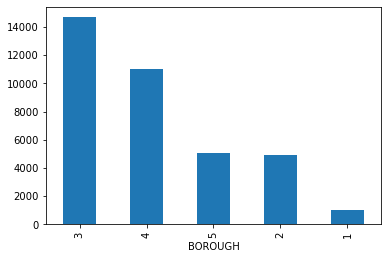

In [48]:
# sales_df.groupby('BOROUGH').count()
borough_df = sales_df.value_counts("BOROUGH")
borough_df.plot.bar()